In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set(style='whitegrid', color_codes=True)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [154]:
df = pd.read_csv('videos-stats.csv')

In [158]:
df.head()

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0


In [156]:
df_original = df.copy()

In [157]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [159]:
df.isna().sum()

Title           0
Video ID        0
Published At    0
Keyword         0
Likes           2
Comments        2
Views           2
dtype: int64

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1881 entries, 0 to 1880
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1881 non-null   object 
 1   Video ID      1881 non-null   object 
 2   Published At  1881 non-null   object 
 3   Keyword       1881 non-null   object 
 4   Likes         1879 non-null   float64
 5   Comments      1879 non-null   float64
 6   Views         1879 non-null   float64
dtypes: float64(3), object(4)
memory usage: 103.0+ KB


In [161]:
df['Likes'].describe()

count    1.879000e+03
mean     1.700610e+05
std      7.962293e+05
min     -1.000000e+00
25%      2.672500e+03
50%      1.478700e+04
75%      6.090600e+04
max      1.644556e+07
Name: Likes, dtype: float64

In [162]:
df['Comments'].describe()

count      1879.000000
mean       7863.331559
std       37879.964926
min          -1.000000
25%         199.000000
50%         814.000000
75%        3377.500000
max      732818.000000
Name: Comments, dtype: float64

In [163]:
df['Views'].describe()

count    1.879000e+03
mean     1.161292e+07
std      1.084450e+08
min      2.500000e+01
25%      8.451500e+04
50%      5.917210e+05
75%      2.804978e+06
max      4.034122e+09
Name: Views, dtype: float64

In [164]:
df['Keyword'].value_counts()

Keyword
machine learning    50
reaction            50
asmr                50
trolling            50
mrbeast             50
cnn                 50
history             50
interview           50
physics             50
minecraft           50
cubes               50
crypto              50
tutorial            50
marvel              50
data science        50
game development    50
xbox                49
sports              49
sat                 49
computer science    48
nintendo            48
tech                48
food                48
how-to              48
business            48
chess               47
biology             47
music               46
literature          46
google              45
movies              45
mukbang             45
bed                 44
gaming              43
apple               42
lofi                41
news                39
finance             39
animals             38
education           24
mathchemistry       15
Name: count, dtype: int64

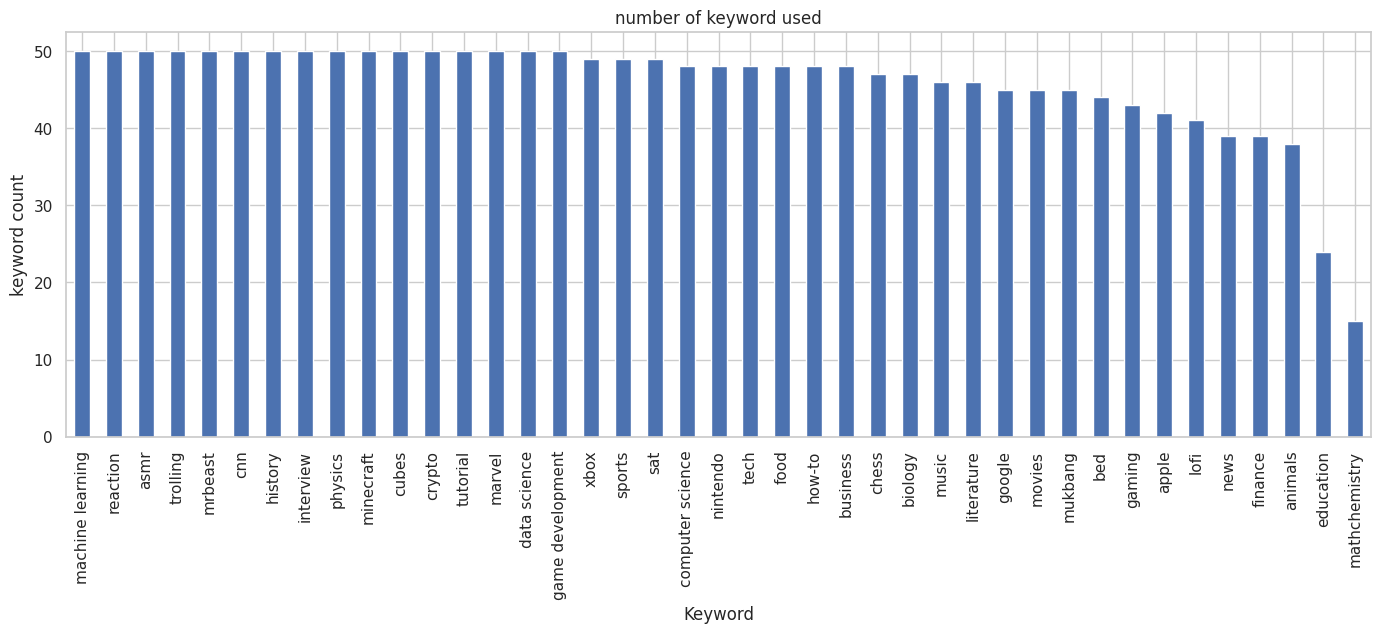

In [168]:
df['Keyword'].value_counts().plot(kind="bar", figsize=(15, 5), ylabel="keyword count", title="number of keyword used")
plt.show()

In [169]:
df.sample(2)

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
1513,Computer Science Degree Vs Computer Engineerin...,sdDklIYkWA0,2022-06-18,computer science,1514.0,251.0,37830.0
819,Eating MEAT in VEGAN Zoom Classes!,kkdUBBMNpI4,2022-01-31,trolling,127211.0,3593.0,2987298.0


In [180]:
df[df['Keyword'] == "computer science"].sort_values(by="Views", ascending=False).head(10)

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
1495,3 years of Computer Science in 8 minutes,ReVeUvwTGdU,2018-07-24,computer science,186881.0,8575.0,7004107.0
1511,Lec 1 | MIT 6.00 Introduction to Computer Scie...,k6U-i4gXkLM,2009-08-20,computer science,61813.0,3416.0,6091315.0
1497,Computer Scientist Explains One Concept in 5 L...,fOGdb1CTu5c,2022-01-18,computer science,128268.0,4356.0,4991078.0
1493,Introduction to Programming and Computer Scien...,zOjov-2OZ0E,2020-04-21,computer science,131961.0,3037.0,4849924.0
1494,Map of Computer Science,SzJ46YA_RaA,2017-09-06,computer science,202969.0,3572.0,4801805.0
1498,Early Computing: Crash Course Computer Science #1,O5nskjZ_GoI,2017-02-22,computer science,62009.0,1740.0,3134189.0
1510,Boolean Logic &amp; Logic Gates: Crash Course ...,gI-qXk7XojA,2017-03-08,computer science,47204.0,1277.0,2302755.0
1516,The Math Needed for Computer Science,eSFA1Fp8jcU,2018-04-21,computer science,59163.0,1583.0,1754969.0
1535,Electronic Computing: Crash Course Computer Sc...,LN0ucKNX0hc,2017-03-01,computer science,32189.0,878.0,1750656.0
1504,My Regrets as a Computer Science Student,xa6me8wou_k,2019-07-03,computer science,63890.0,2427.0,1732512.0


<Axes: title={'center': 'Top 15 computer science videos by view count'}, xlabel='Title'>

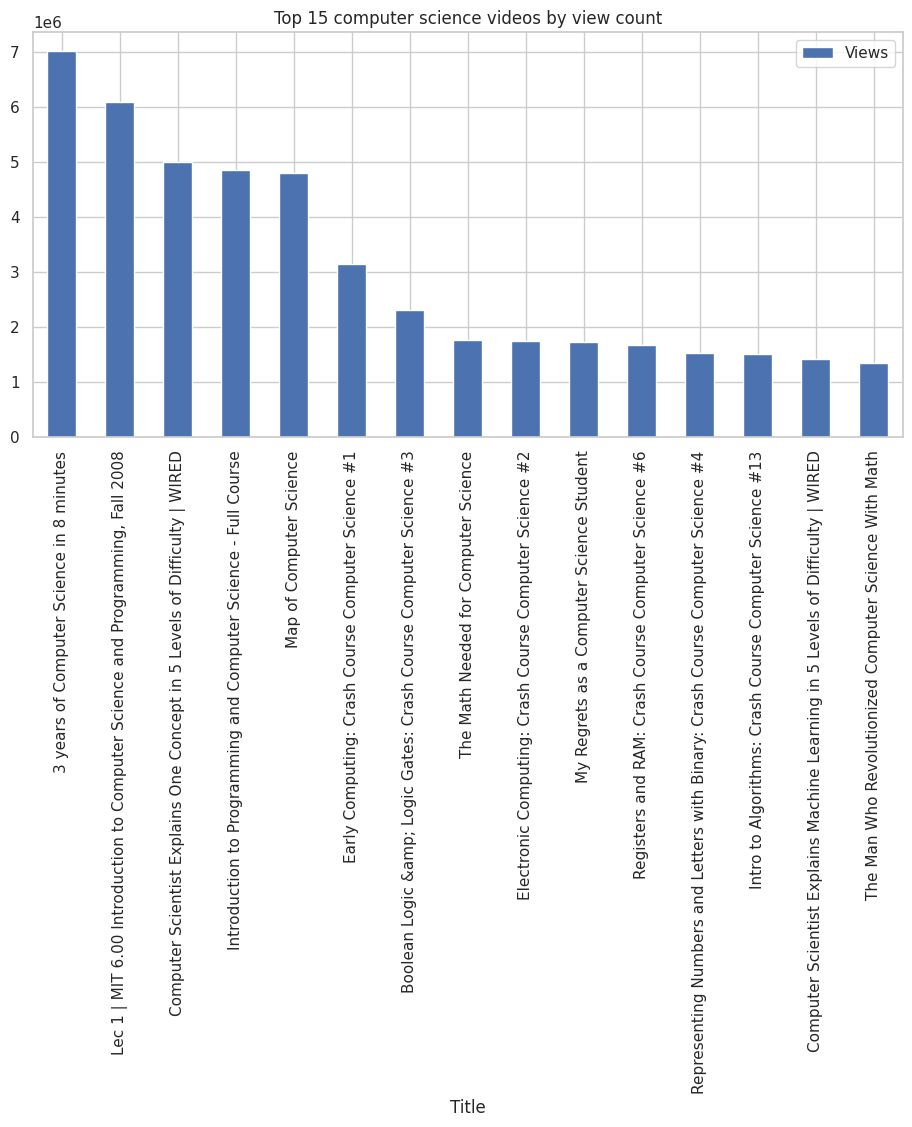

In [177]:
df[df['Keyword'] == "computer science"].sort_values(by="Views", ascending=False).head(15).plot(kind="bar",\
x="Title", y="Views", figsize=(10, 5), title="Top 15 computer science videos by view count")

In [179]:
df[df['Keyword'] == "machine learning"].sort_values(by="Views", ascending=False).head(10)

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
1838,Machine Learning Course for Beginners,NWONeJKn6kc,2021-08-30,machine learning,300789.0,6254.0,11814893.0
1851,2020 Machine Learning Roadmap (95% valid for 2...,pHiMN_gy9mk,2020-07-12,machine learning,176978.0,7152.0,10817160.0
1858,How I Learnt Machine Learning In 6 Steps (3 mo...,OuC3wgp1Fnw,2019-10-23,machine learning,463331.0,21849.0,7497071.0
1863,Machine Learning Fundamentals: Bias and Variance,EuBBz3bI-aA,2018-09-17,machine learning,109335.0,2712.0,5028230.0
1831,Machine Learning Basics | What Is Machine Lear...,ukzFI9rgwfU,2018-09-19,machine learning,43189.0,1155.0,2317183.0
1834,What is Machine Learning?,HcqpanDadyQ,2017-08-24,machine learning,38776.0,566.0,2278698.0
1847,Intro to Machine Learning (ML Zero to Hero - P...,KNAWp2S3w94,2019-08-30,machine learning,34464.0,822.0,1651599.0
1833,Machine Learning Full Course - Learn Machine L...,GwIo3gDZCVQ,2019-09-22,machine learning,36835.0,1265.0,1456270.0
1850,The Mathematics of Machine Learning,Rt6beTKDtqY,2018-11-30,machine learning,27736.0,692.0,1432027.0
1859,Deep Learning Crash Course for Beginners,VyWAvY2CF9c,2020-07-30,machine learning,18847.0,76.0,1414209.0


<Axes: title={'center': 'Top 10 machine learning videos by view count'}, ylabel='Published At'>

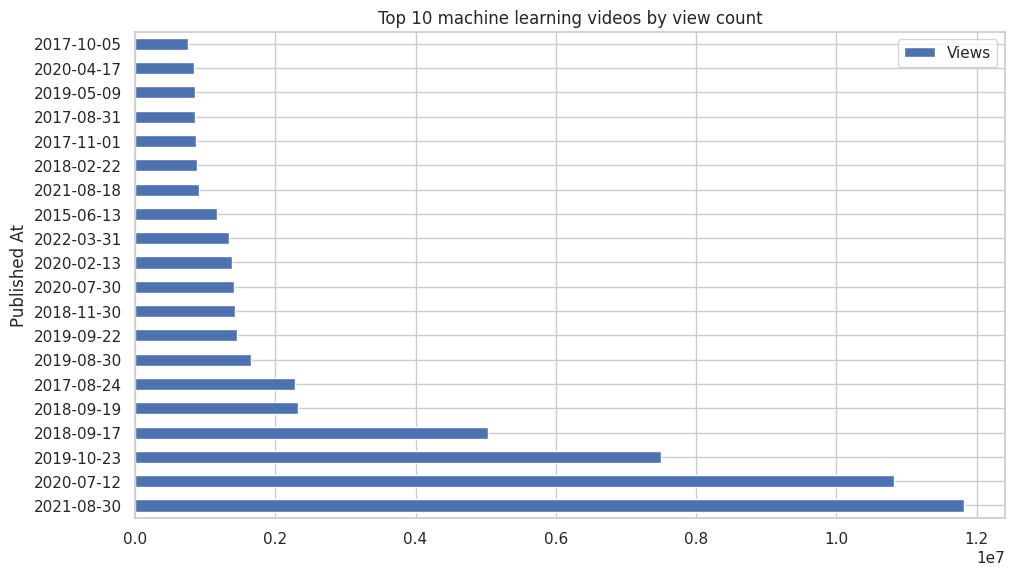

In [186]:
df[df['Keyword'] == "machine learning"].sort_values(by="Views", ascending=False).head(20).plot(kind="barh",\
x="Published At", y="Views", figsize=(10, 6), title="Top 10 machine learning videos by view count")

In [187]:
df.sample(2)

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
470,Elefante38 IMPRESSIONA SUPER GM!,2pt9bQzRCYs,2022-08-24,chess,8738.0,412.0,53211.0
1681,Bionic Avengers Bad On Defense? - Masters Cosm...,r6LvjmIKEB0,2022-08-23,marvel,346.0,24.0,9050.0


In [200]:
df.head()

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0


In [202]:
df['Keyword'].unique()

array(['tech', 'news', 'gaming', 'sports', 'how-to', 'business',
       'tutorial', 'finance', 'crypto', 'cubes', 'chess', 'apple',
       'google', 'interview', 'history', 'literature', 'bed', 'trolling',
       'asmr', 'music', 'food', 'mukbang', 'reaction', 'lofi', 'animals',
       'education', 'minecraft', 'sat', 'mrbeast', 'cnn', 'mathchemistry',
       'biology', 'physics', 'computer science', 'nintendo', 'xbox',
       'marvel', 'movies', 'data science', 'game development',
       'machine learning'], dtype=object)

<Axes: title={'center': 'Average Views by Keyword'}, ylabel='Keyword'>

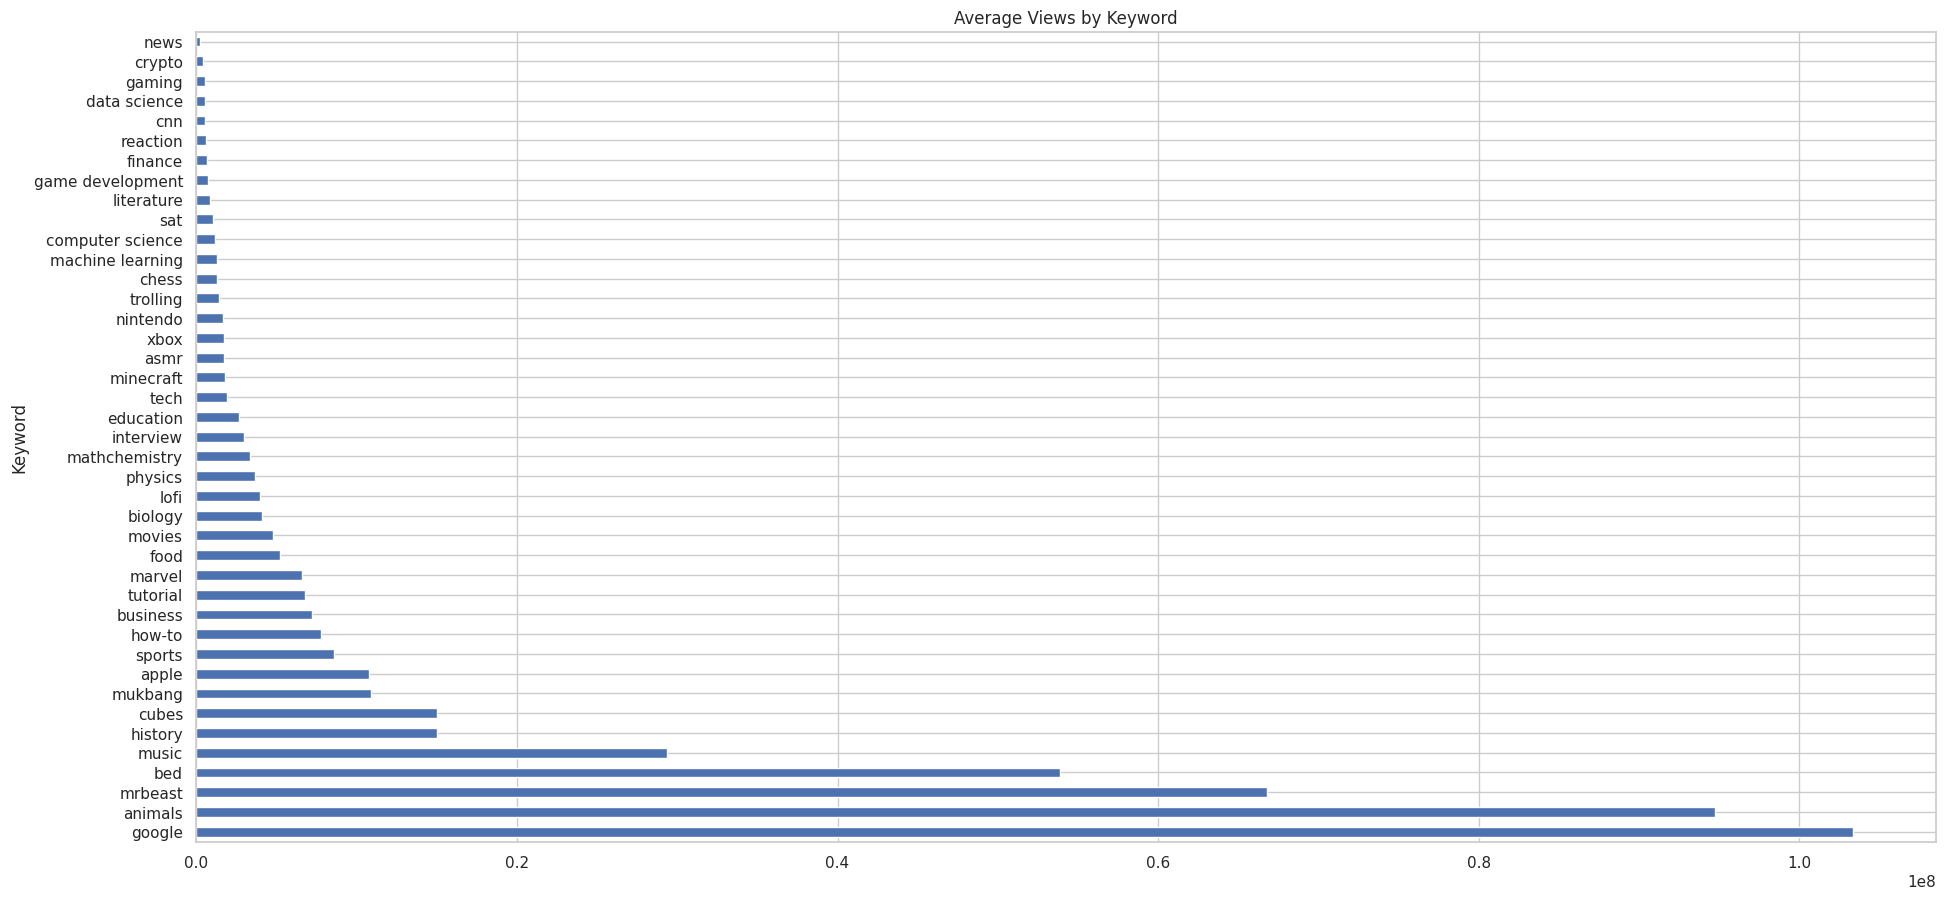

In [209]:
df.groupby('Keyword')['Views'].mean().sort_values(ascending=False).plot(kind="barh", figsize=(20, 10),\
                                                                        title="Average Views by Keyword")

<Axes: title={'center': 'Average Comments by Keyword'}, ylabel='Keyword'>

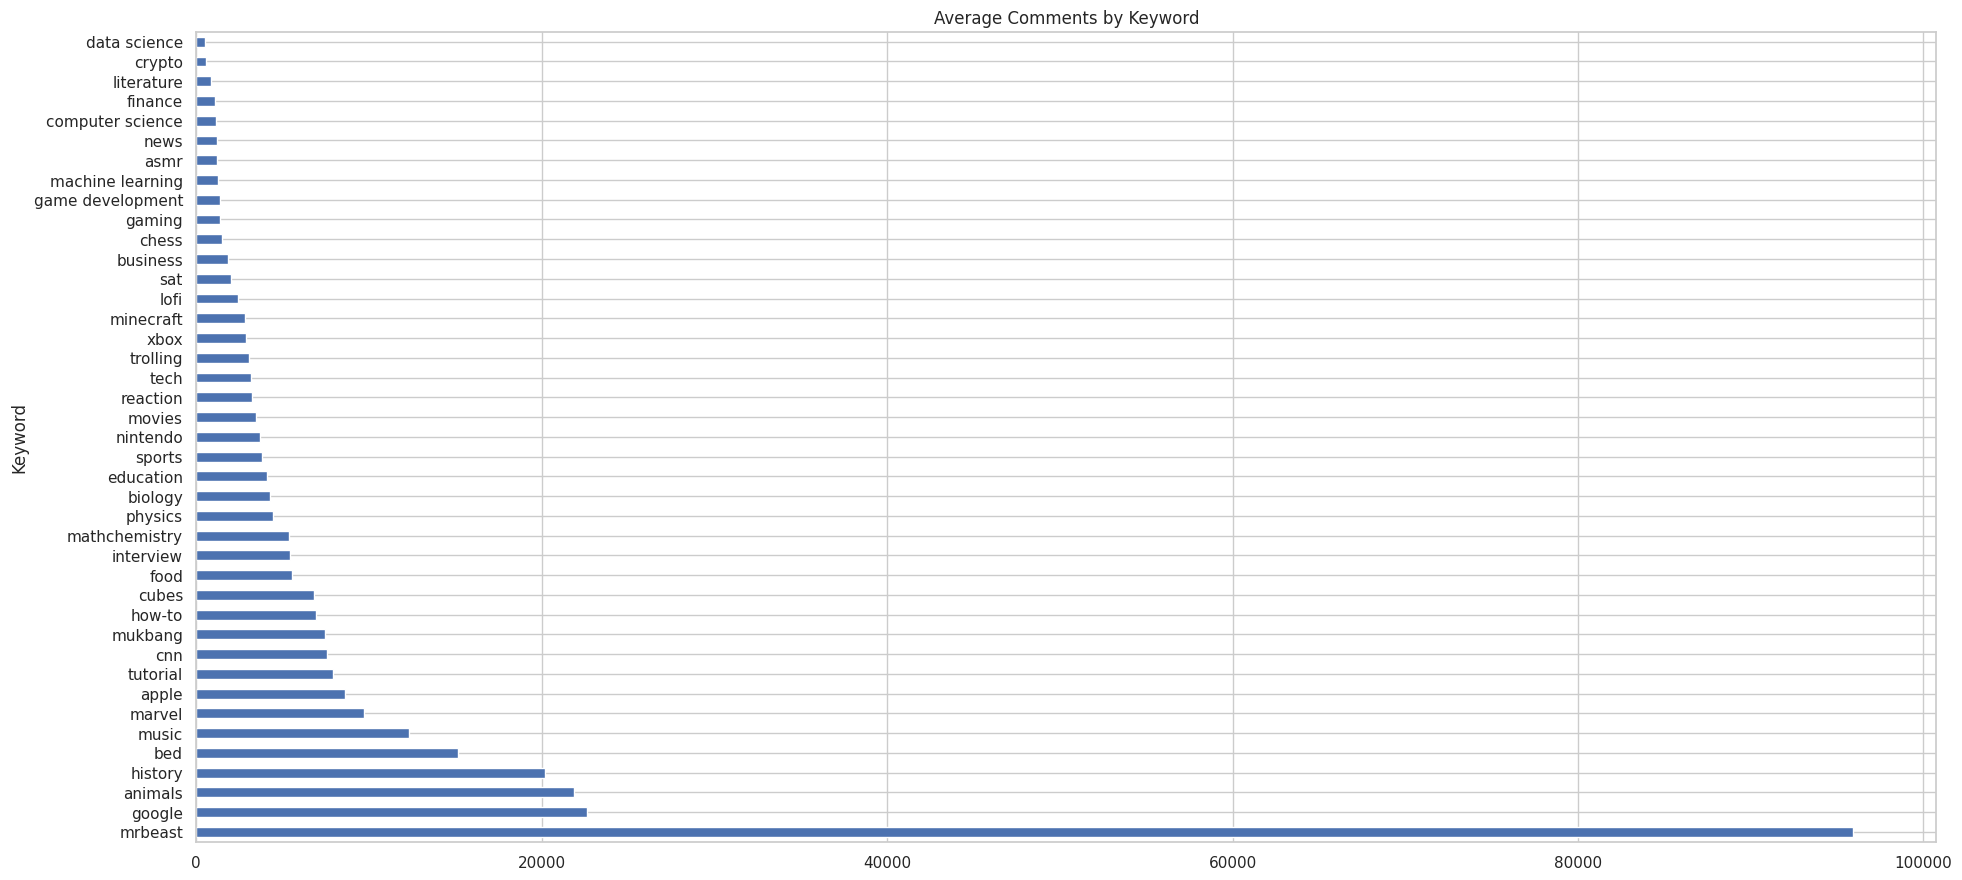

In [213]:
df.groupby('Keyword')['Comments'].mean().sort_values(ascending=False).plot(kind="barh", figsize=(20, 10),\
                                                                        title="Average Comments by Keyword")

<Axes: title={'center': 'Average Likes by Keyword'}, ylabel='Keyword'>

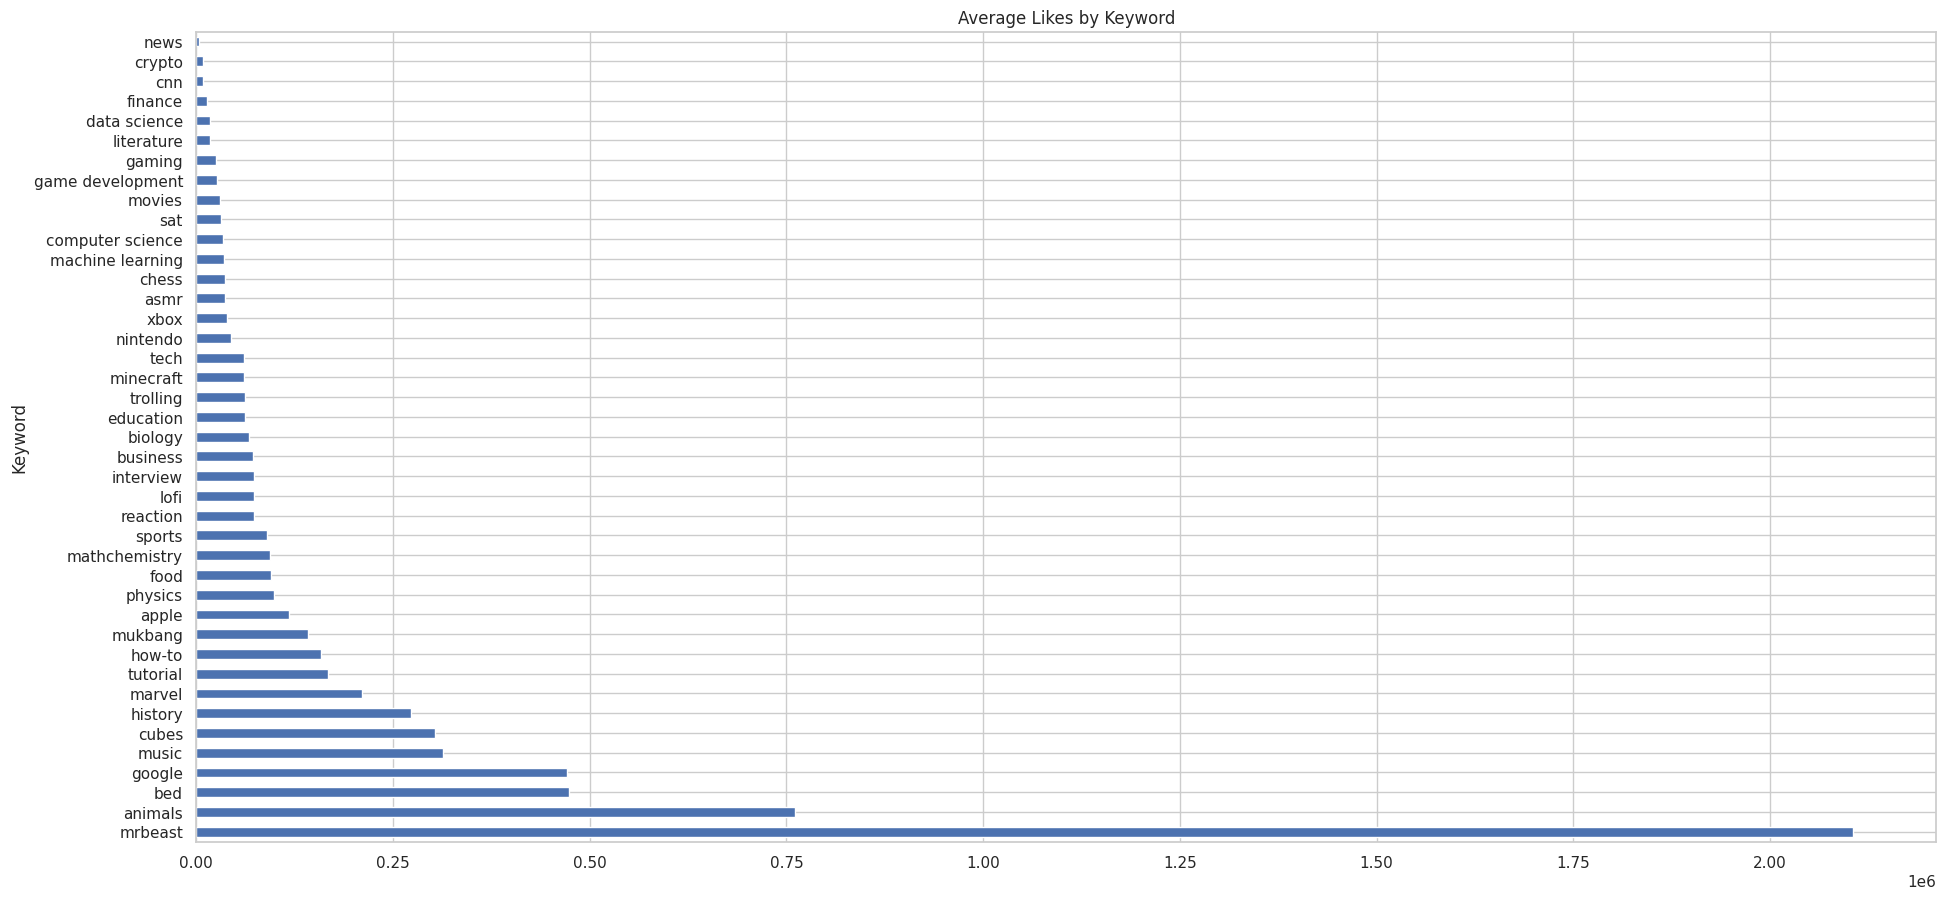

In [212]:
df.groupby('Keyword')['Likes'].mean().sort_values(ascending=False).plot(kind="barh", figsize=(20, 10),\
                                                                        title="Average Likes by Keyword")

<Axes: title={'center': 'Average Views by Keyword'}>

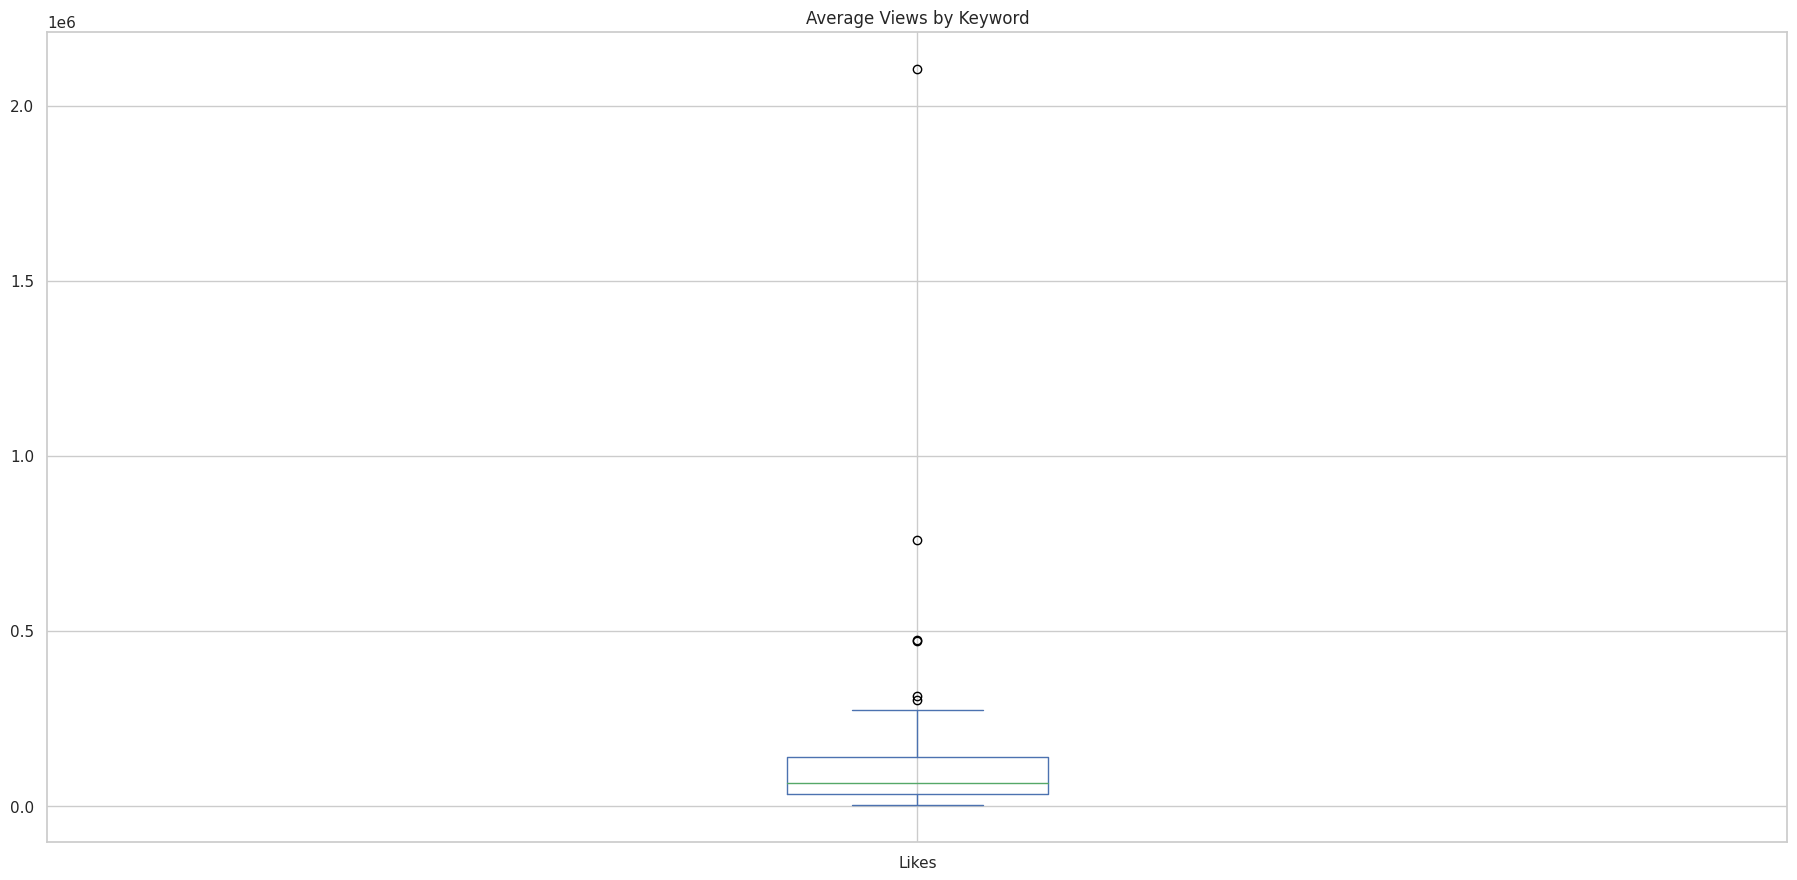

In [214]:
df.groupby('Keyword')['Likes'].mean().sort_values(ascending=False).plot(kind="box", figsize=(20, 10),\
                                                                        title="Average Views by Keyword")

In [215]:
df.sample()

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
280,‘Clean Girl’ Makeup Tutorial &amp; Hydrated Sk...,JPUbSvsxjsY,2022-06-20,tutorial,30518.0,486.0,879609.0


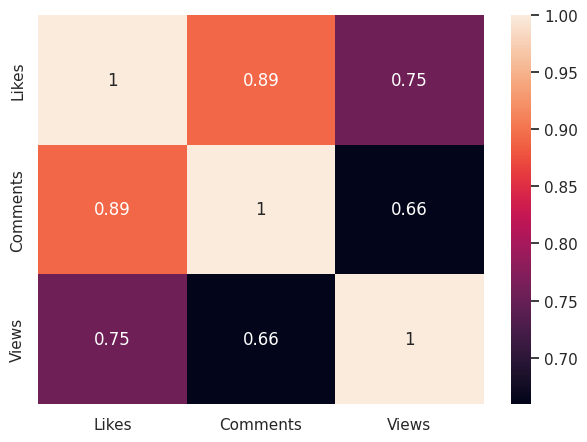

In [216]:
# correlation matrix
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.show()

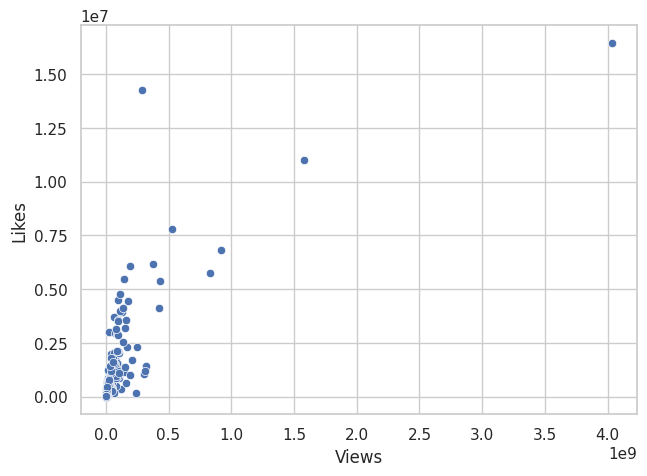

In [217]:
# scatter plot for views and likes
sns.scatterplot(x='Views', y='Likes', data=df)
plt.show()

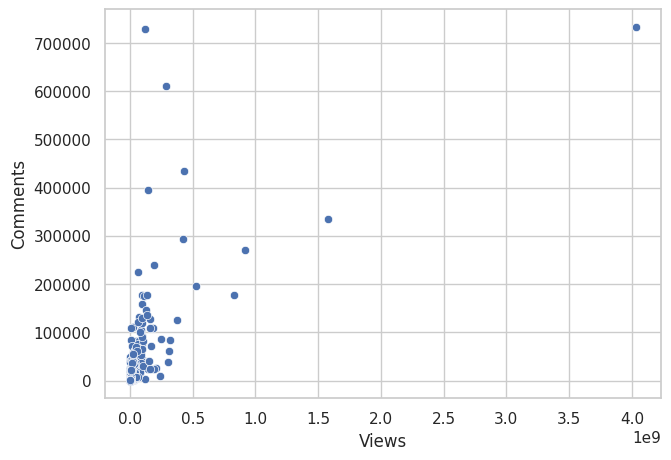

In [219]:
# scatter plot for views and comments
sns.scatterplot(x='Views', y='Comments', data=df)
plt.show()

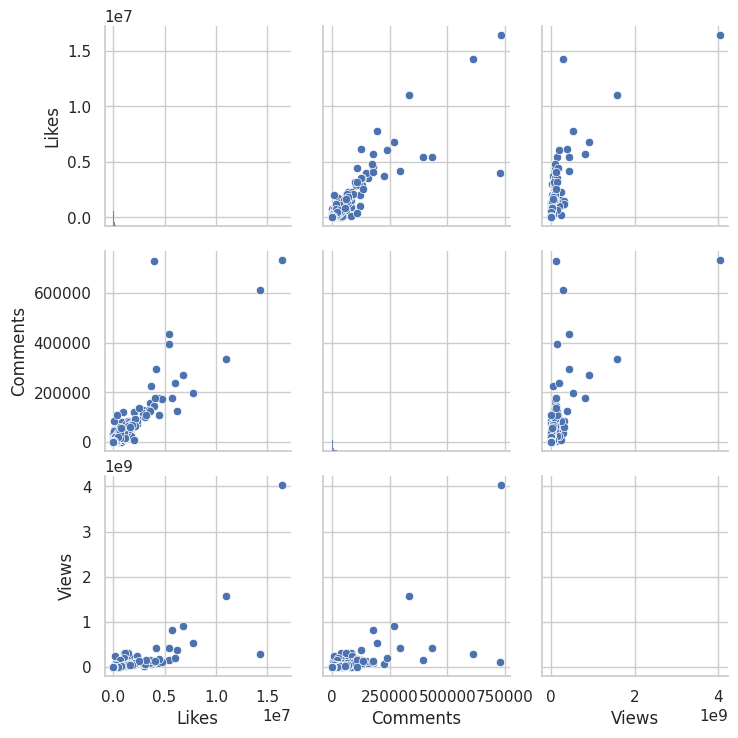

In [220]:
# pairplot
sns.pairplot(df)
plt.show()